Familiarize with longitudinal data of T Cell Recepors. We will import samples of TCRs taken at different time points in a COVID infected individual. We will compute a few basic statistics of this dataset, which show the huge diverity and complexity of our immune system.

In [1]:
import numpy as np
import noisets
from noisets import noisettes as ns

import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1/ Familiarize with longitudinal data of T Cell Recepors

In [2]:
data_folder = 'data_examples/'
patient = 'MP'

data_pre = ns.longitudinal_analysis(patient, data_folder)

In [3]:
clones, times = data_pre.import_clones()

Function that imports all the clonotypes of a given patient and stores them in a dictionary. It returns also the list of ordered time points of such tables.

In [4]:
clones.keys()

dict_keys(['MP_80_F2', 'MP_37_F1', 'MP_30_F1', 'MP_45_F2', 'MP_15_F1', 'MP_37_F2', 'MP_30_F2', 'MP_45_F1', 'MP_15_F2', 'MP_80_F1'])

In [5]:
clones['MP_80_F2']

,N. Seq. CDR3,AA. Seq. CDR3,Clone count,Clone fraction
0,TGTGCCAGCAGCGCCCCAGCGGGGGTCGGCGAGCAGTACTTC,CASSAPAGVGEQYF,80911,4.515203e-02
1,TGTGCCAGCAGCCCAAGGGCAGGGAAGGGTGAGCAGTTCTTC,CASSPRAGKGEQFF,67618,3.773393e-02
2,TGTGCCAGCAGTTTTTGGACACCCTACGAGCAGTACTTC,CASSFWTPYEQYF,46468,2.593127e-02
3,TGTGCCAGCAGCCCGCCGGGACAGCACAATGAGCAGTTCTTC,CASSPPGQHNEQFF,31502,1.757955e-02
4,TGTGCCAGCAGCTTGGAAGGGTACGGGACGCCGGCTGAAGCTTTCTTT,CASSLEGYGTPAEAFF,30449,1.699193e-02
...,...,...,...,...
556217,TGTGCCGGGGTC,CAGV,1,5.580457e-07
556218,TGTGCCACCGTC,CATV,1,5.580457e-07
556219,TGTGCCAGCAGC,CASS,1,5.580457e-07
556220,TGCGCCAGGCCA,CARP,1,5.580457e-07


In [6]:
times, #number of days

(array([15, 30, 37, 45, 80]),)

In [7]:
clones_merged = data_pre.merge_replicates()

In [8]:
clones_merged.keys()

dict_keys(['MP_15', 'MP_30', 'MP_37', 'MP_45', 'MP_80'])

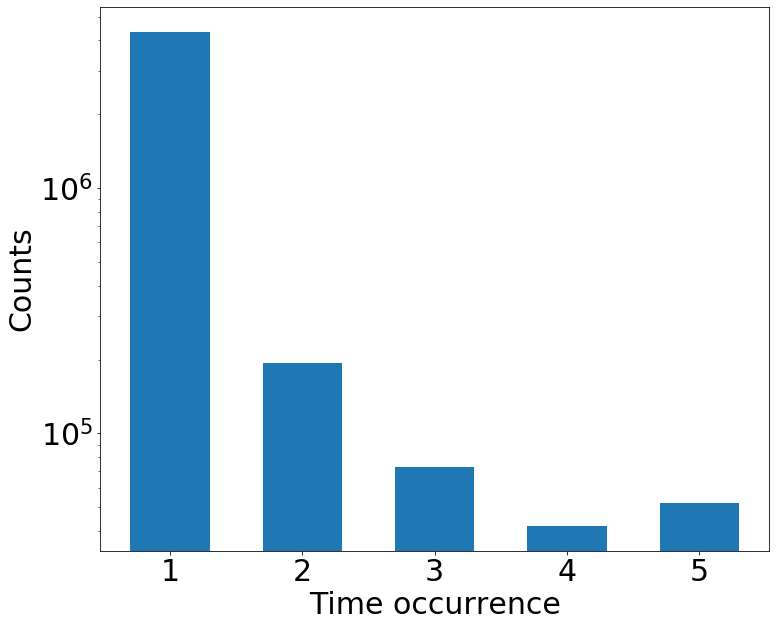

In [9]:
filename = 'persistence_plot'
data_pre.plot_hist_persistence(filename)

In [10]:
unique_clones, time_occurrence = data_pre.persistence_clones()

In [11]:
np.sum(time_occurrence == 2)

192974

## 2/ Look at top clones trajectory

In [12]:
n_top_clones = 100
top_clones = data_pre.get_top_clones_set(n_top_clones)

In [13]:
top_clones

{'TGCAGCGTATATACAGGGTCATCCTACGAGCAGTACTTC',
 'TGCAGCGTTGACAGCGGGGGGGACACCGGGGAGCTGTTTTTT',
 'TGCAGTGCTAGACTACGGGGGACGAACACCGGGGAGCTGTTTTTT',
 'TGCAGTGCTAGGACAGGGATCCGCTACGAGCAGTACTTC',
 'TGCAGTGCTAGGGTTCGCGACACTGAAGCTTTCTTT',
 'TGCAGTGCTCCCGACAGGGGACTGGATACGCAGTATTTT',
 'TGCAGTGCTCGTGGAAACACCATATATTTT',
 'TGCGCCAGCAGCCAACGGGAAGTTACTGAAGCTTTCTTT',
 'TGCGCCAGCAGCCAAGAAACTAGCGGGGGGTACAATGAGCAGTTCTTC',
 'TGCGCCAGCAGCCAAGACAGTGGTGGGGCCGGGGAGCTGTTTTTT',
 'TGCGCCAGCAGCCAAGATTCCGGGGGCAGTCAGCCCCAGCATTTT',
 'TGCGCCAGCAGCCAAGATTCCGGGGGGGCCGGTGAGCAGTTCTTC',
 'TGCGCCAGCAGCCAAGCAGGGGGCTCTGGGGCCAACGTCCTGACTTTC',
 'TGCGCCAGCAGCCAAGCGGGGGGCTCCTACAATGAGCAGTTCTTC',
 'TGCGCCAGCAGCCAAGGGACAGGGGGCTACAATGAGCAGTTCTTC',
 'TGCGCCAGCAGCCAATGGGCGAAGGACACTGAAGCTTTCTTT',
 'TGCGCCAGCAGCCAGACTAGCGGTTCTGGGGCCAACGTCCTGACTTTC',
 'TGCGCCAGCAGCCAGGCAGGGCCTCGGACCGGGGAGCTGTTTTTT',
 'TGCGCCAGCAGCCCAGGAATGAACACCGGGGAGCTGTTTTTT',
 'TGCGCCAGCAGCCCCCCGAGGGCCGATACGCAGTATTTT',
 'TGCGCCAGCAGCCCTAGGGAGGTGGCTGAAGCTTTCTTT',
 'TGCGCCAG

In [14]:
data_pre.build_traj_frame(top_clones)

,Clone cumul count,t15,t30,t37,t45,t80
TGTGCCAGCAGCGCACTCGACAGGGACACCTACGAGCAGTACTTC,29207.0,5039.0,4921,5568,8276,5403
TGCGCCAGCAGCCAAGATTCCGGGGGCAGTCAGCCCCAGCATTTT,5690.0,1093.0,1141,1100,1622,734
TGTGCCAGCAGCCTAGGACTAGCGGGGGGGAATGAGCAGTTCTTC,12466.0,1904.0,1994,2397,4504,1667
TGTGCCAGCAGCCCCGGCGGAGGGCGTGCAACTAATGAAAAACTGTTTTTT,17183.0,2849.0,2465,2749,6214,2906
TGTGCCAGCAGCTTATGGGATACTGGCCCCCTAGAGACCCAGTACTTC,9159.0,1527.0,1540,1500,2011,2581
...,...,...,...,...,...,...
TGTGCCAGCAGCCAAGGACAGGGGGACACCGGGGAGCTGTTTTTT,4065.0,590.0,555,593,1082,1245
TGTGCCAGCAGTCACTCCCTACAGGGGACAGCAACTAATGAAAAACTGTTTTTT,28689.0,5534.0,5184,5066,6164,6741
TGTGCCAGCAGCCAAGCACTAGCGGGGGGTACAGATACGCAGTATTTT,5833.0,766.0,1119,1135,1508,1305
TGTGCCAGCAGCTTAGGCCTAATGAGGAGGGTCGATTTCTTT,9232.0,1703.0,1721,1545,2040,2223


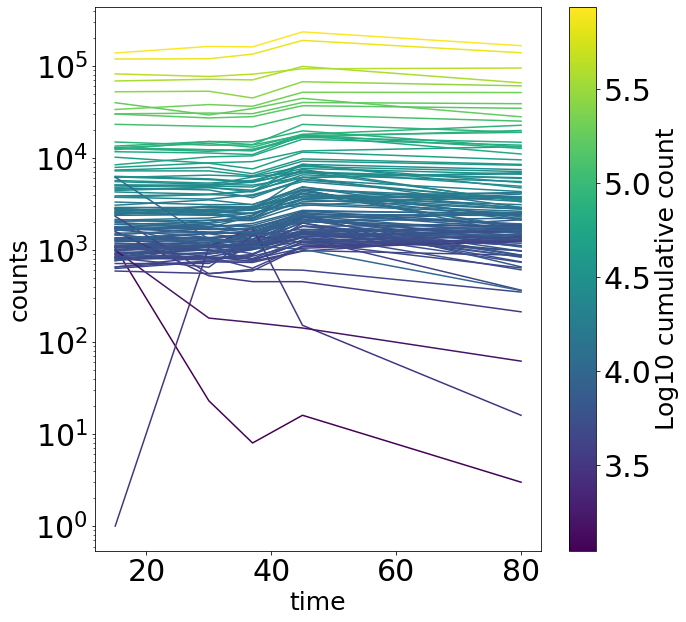

In [15]:
filename = 'trajectories'
data_pre.plot_trajectories(n_top_clones, filename)

## 3/ PCA to decipher different clonal dynamics

In [16]:
n_top_clones = 1000
pca, clustering = data_pre.PCA_traj(n_top_clones)

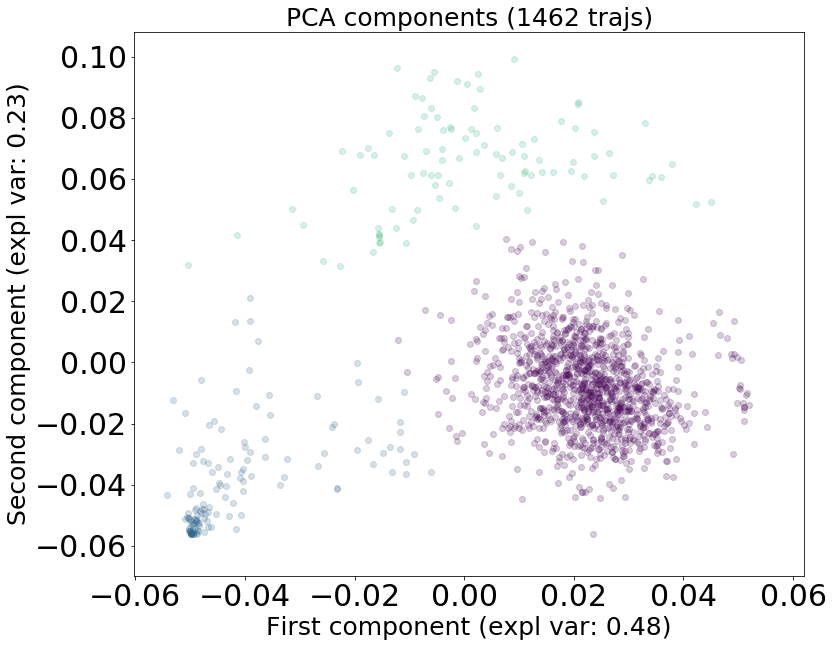

In [17]:
filename = 'PCA_clusters'
data_pre.plot_clusters2D(n_top_clones, filename)

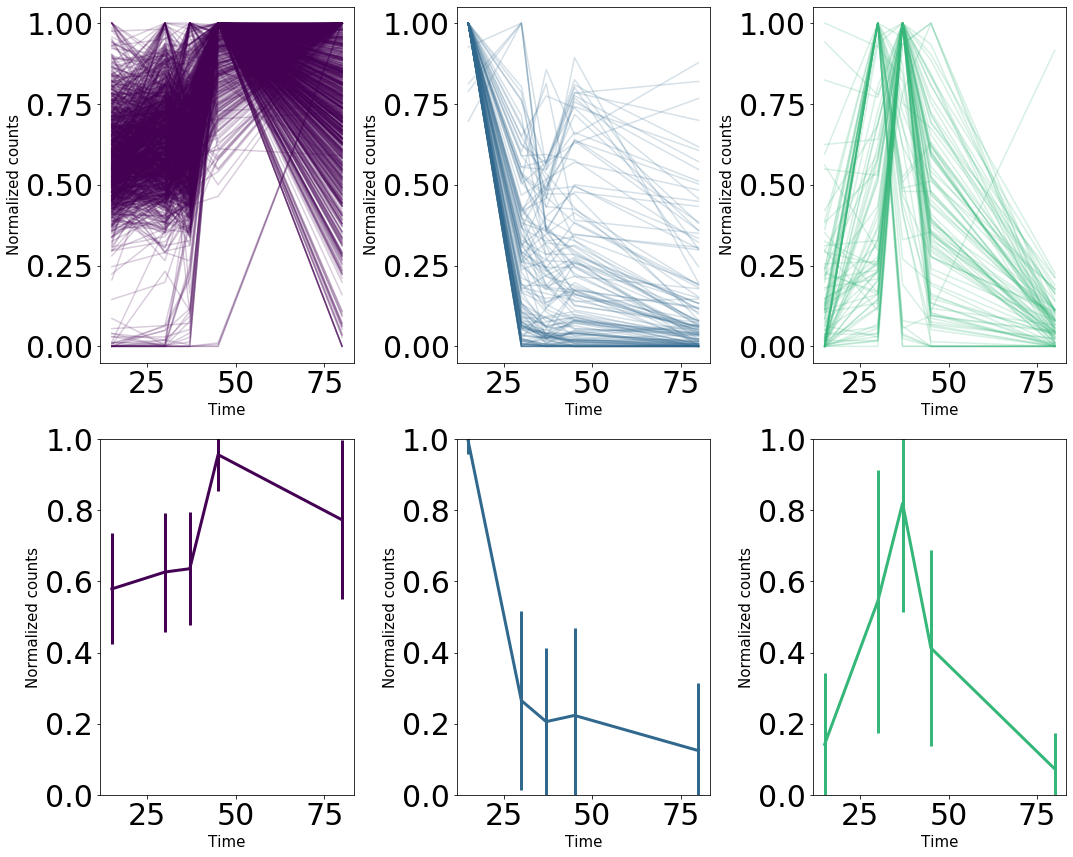

In [18]:
filename = 'PCA_traj'
data_pre.plot_traj_clusters(n_top_clones, filename)